# Data Hackers Survey 2022


<p style="font-size:18px">  Data Hackers Survey 2022 foi uma pesquisa realizada entre outubro e novembro de 2022, a partir de um trabalho conjunto do Data Hackers e da Bain & Company.   
Mais de 4 mil pessoas responderam o questionário online. As questões abordaram dados demográficos, dados sobre estudo, trabalho, carreira, objetivos e conhecimentos.  O objetivo desse notebook é explorar características e comportamentos por <span style="font-weight:bold;"> Faixa Etária </span> . </p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import warnings



mainblue="#7b90ed"
secondblue="#a2b3fa"
maingrey='#d7d8d9'

#  styling dataframe
heading_prop = [('font-size', '16px')]
cell_prop = [('font-size', '14px')]
dfstyle = [dict(selector="th", props=heading_prop),dict(selector="td", props=cell_prop)]


df= pd.read_csv("/kaggle/input/state-of-data-2022/State_of_data_2022.csv")

# renomeando colunas
df=df.rename(columns={"('P1_a_1 ', 'Faixa idade')": "Faixa_Etaria",
                      "('P1_b ', 'Genero')":"Genero",
                      "('P1_i_2 ', 'Regiao onde mora')":"Regiao_Moradia",
                      "('P1_g ', 'vive_no_brasil')":"Vive_BR",
                      "('P1_l ', 'Nivel de Ensino')": "Nivel_Ensino",
                      "('P1_m ', 'Área de Formação')": "Area_Formação",
                      "('P2_a ', 'Qual sua situação atual de trabalho?')": "Situação_Trabalho",
                      "('P2_d ', 'Gestor?')": "Gestor",
                      "('P2_h ', 'Faixa salarial')": "Faixa_Salarial",
                      "('P2_k ', 'Você está satisfeito na sua empresa atual?')":"Satisfeito_Empresa",
                      "('P2_q ', 'Qual a forma de trabalho ideal para você?')":"Forma_Ideal" ,
                      "('P2_g ', 'Nivel')":"Nivel_Cargo",
                      "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')":"Tempo_Experiencia_Dados",
                      "('P2_f ', 'Cargo Atual')":"Cargo"
                     })

# selecionando
df=df[["('P0', 'id')",
       "Faixa_Etaria", 
       "Genero",
       "Regiao_Moradia",
       "Vive_BR",
       "Nivel_Ensino",
       "Area_Formação",
       "Situação_Trabalho",
       "Gestor",
       "Faixa_Salarial",
       "Satisfeito_Empresa",
       "Forma_Ideal",
       "Nivel_Cargo",
       "Tempo_Experiencia_Dados",
       "Cargo"
      ]]

# algumas checagens
#df.duplicated().sum()
#df[df.duplicated(keep=False)]
df = df.drop_duplicates()
#df.shape

# 1 - Faixa Etária

<p style="font-size:18px;font-weight:bold">Como estão distribuidas as faixas etárias?</p>

In [2]:
# conferências importantes
#df["Faixa_Etaria"].apply(type).value_counts()
#df["Faixa_Etaria"].isnull().sum()
#df["Faixa_Etaria"].value_counts()

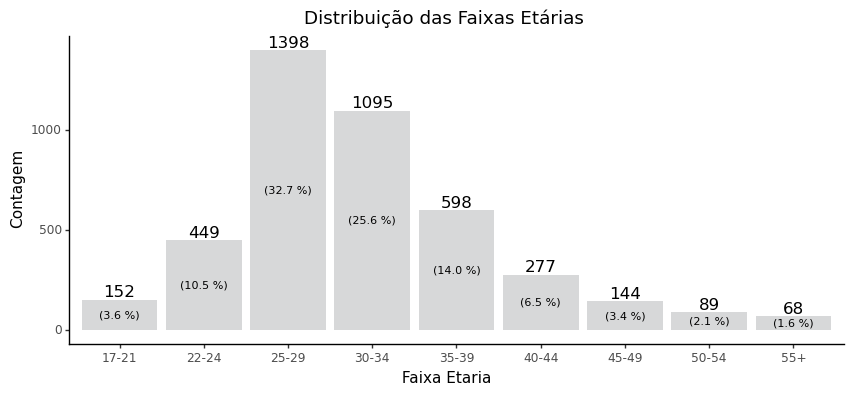

In [3]:
df_fe= df["Faixa_Etaria"].value_counts().to_frame().reset_index()
df_fe.columns=["Faixa_Etaria","Contagem"]
df_fe['Porcentagem']= round((df_fe['Contagem']/df_fe['Contagem'].sum())*100,1)
df_fe["Faixa_Etaria"] = pd.Categorical(df_fe["Faixa_Etaria"], ["17-21", "22-24", "25-29", "30-34","35-39", "40-44","45-49", "50-54","55+"],ordered=True)
df_fe = df_fe.sort_values('Faixa_Etaria')

(
    ggplot(df_fe, aes(x='Faixa_Etaria',y='Contagem'))+
    geom_bar(stat="identity", fill= maingrey)+
    geom_text(aes(label="Contagem"),size=12, va="bottom")+
    geom_text(aes(label="Porcentagem"),size=8, format_string="({:.1f} %)", position=position_stack(vjust = 0.5))+
    labs(title="Distribuição das Faixas Etárias", x= " Faixa Etaria")+
    theme_classic()+
    theme(figure_size=(10, 4))
).draw();

<p style="font-size:18px;font-weight:bold"><p style="font-size:18px"> As maiores participações são das faixas 25-29 e 30-34.
<p style="font-size:18px;font-weight:bold"><p style="font-size:18px"> Para facilitar algumas análises, a faixa etária será simplificada para se aproximar do conceito "twenties", "thirties", "forties"...</p>

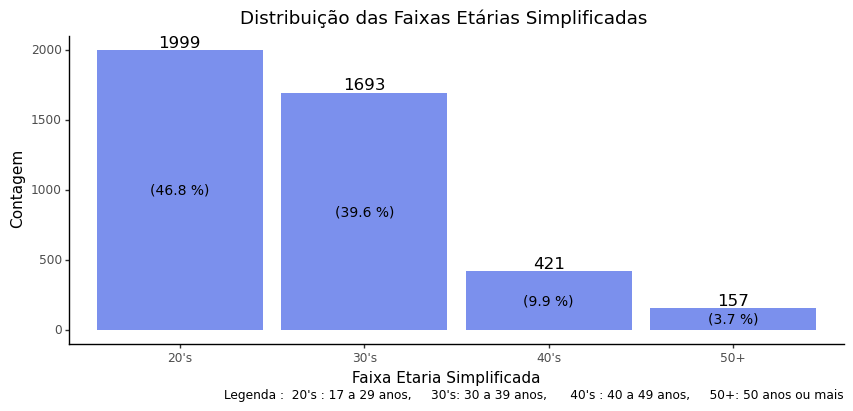

In [4]:
dict_fes=dict()
dict_fes={"17-21": "20's",
          "22-24":"20's",
          "25-29":"20's",
          "30-34":"30's",
          "35-39":"30's",
          "40-44":"40's",
          "45-49":"40's",
          "50-54":"50+",
          "55+":"50+"}

df['Faixa_Etaria_Simplificada'] = df["Faixa_Etaria"].map(dict_fes)

df_fes= df["Faixa_Etaria_Simplificada"].value_counts().to_frame().reset_index()
df_fes.columns=["Faixa_Etaria_Simplificada","Contagem"]
df_fes['Porcentagem']= round((df_fes['Contagem']/df_fes['Contagem'].sum())*100,1)
df_fes["Faixa_Etaria_Simplificada"] = pd.Categorical(df_fes["Faixa_Etaria_Simplificada"], ["20's", "30's", "40's", "50+"],ordered=True)
df_fes = df_fes.sort_values('Faixa_Etaria_Simplificada')

(
    ggplot(df_fes, aes(x='Faixa_Etaria_Simplificada',y='Contagem'))+
    geom_bar(stat="identity", fill= mainblue)+
    geom_text(aes(label="Contagem"),size=12, va="bottom")+
    geom_text(aes(label="Porcentagem"),size=10, format_string="({:.1f} %)", position=position_stack(vjust = 0.5))+
    labs(title="Distribuição das Faixas Etárias Simplificadas", x= " Faixa Etaria Simplificada", 
         caption=" Legenda :  20's : 17 a 29 anos,     30's: 30 a 39 anos,      40's : 40 a 49 anos,     50+: 50 anos ou mais")+
    theme_classic()+
    theme(figure_size=(10, 4))
).draw();

<p style="font-size:18px;font-weight:bold"><p style="font-size:18px"> A faixa etária mais frequente é a 20's, que vai dos 17 até os 29 anos.  </p></p>

# 2 - Gênero
<p style="font-size:18px;font-weight:bold"> Aproximadamente 75% dos entrevistados são do gênero Masculino.</p>
<p style="font-size:14px"> * Dos 4.270 respondentes, apenas 21 não informaram o gênero - 9 valores faltantes + 12 que marcaram a opção "Prefiro não informar"</p>
<p style="font-size:18px"> Como é a distribuição dos gêneros em cada faixa etária? </p>


In [5]:
# conferências importantes
#df["Genero"].apply(type).value_counts()
#df["Genero"].isnull().sum()
#df["Genero"].value_counts()
#df["Genero"].value_counts()/df["Genero"].value_counts().sum()

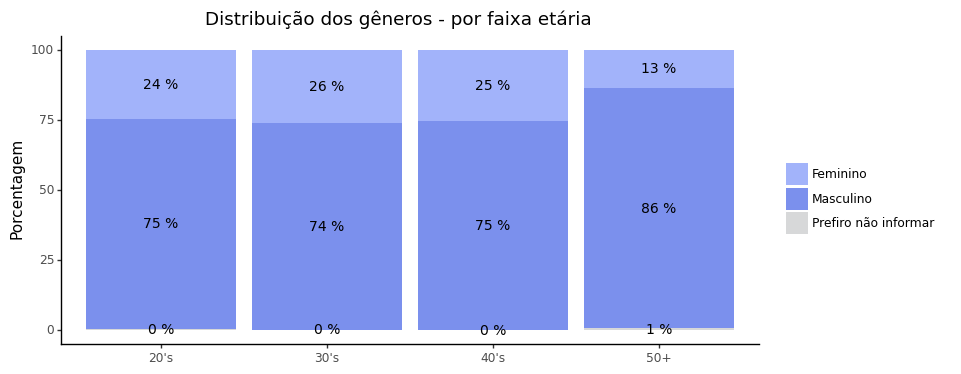

In [6]:
df_gn=df.dropna(subset=['Genero'])
#df_g=df[df['Genero']!="Prefiro não informar"]
df_gn=pd.crosstab(df_gn["Genero"], df_gn["Faixa_Etaria_Simplificada"],normalize='columns')
df_gn=df_gn.unstack().reset_index()
df_gn.columns=["Faixa_Etaria_Simplificada","Genero", "Porcentagem"]
df_gn['Porcentagem']= round(df_gn['Porcentagem']*100,1)

color_dict = {"Feminino": secondblue, 
              "Masculino": mainblue,
              "Prefiro não informar": maingrey}


(
    ggplot(df_gn, aes(x='Faixa_Etaria_Simplificada', y='Porcentagem', fill='Genero') )+
    geom_bar(stat="identity")+
    geom_text(aes(label="Porcentagem"),size=10, format_string="{:.0f} %", position=position_stack(vjust = 0.5))+
    scale_fill_manual(values=color_dict)+
    labs(x="", fill ="")+
    theme_classic()+
    theme(figure_size=(9, 4))+
    labs(title="Distribuição dos gêneros - por faixa etária")

).draw();

<p style="font-size:18px;font-weight:bold"><p style="font-size:18px"> A maior diferença na distribuição de gêneros ficou na faixa dos 50+, onde apenas 13% é do gênero feminino.  </p></p>


# 3 - Região
<p style="font-size:18px;font-weight:bold"> Aproximadamente 63% dos entrevistados que vivem no Brasil* moram da Região Sudeste, 16% no Sul e 14% no Nordeste. </p>
<p style="font-size:14px"> * 100 dos entrevistados não informaram a Região onde vive, estes são os que informaram que não vivem no Brasil.</p>
<p style="font-size:18px"> Alguma faixa etária foge do padrão dessa distribuição? </p>


In [7]:
# conferências importantes
#df["Regiao_Moradia"].apply(type).value_counts()
#df["Regiao_Moradia"].isnull().sum()
#df["Regiao_Moradia"].value_counts()
#df[df['Regiao_Moradia'].isnull()]["Vive_BR"].value_counts()
#df["Vive_BR"].value_counts()
#df["Regiao_Moradia"].value_counts()/df["Regiao_Moradia"].value_counts().sum()

In [8]:
pd.crosstab(df["Faixa_Etaria_Simplificada"],df['Regiao_Moradia'], normalize='index').T.style.set_caption("").background_gradient().format("{:.1%}").set_table_styles(dfstyle)

Faixa_Etaria_Simplificada,20's,30's,40's,50+
Regiao_Moradia,,,,
Centro-oeste,5.5%,4.7%,6.6%,6.4%
Nordeste,13.8%,12.6%,14.6%,15.4%
Norte,2.1%,1.4%,2.2%,1.9%
Sudeste,63.3%,63.9%,61.6%,62.2%
Sul,15.2%,17.4%,15.1%,14.1%


<p style="font-size:18px"> A participação de cada região é similar nas as faixas etárias simplificadas. </p></p>

# 4 - Nível Ensino

<p style="font-size:18px;font-weight:bold"> Aproximadamente 35% dos respondentes tem nível de ensino Graduação/Bacharelado e 31% tem nível Pós-Graduação </p>
<p style="font-size:18px"> Como é a participação dos níveis de ensino em cada faixa etária? </p>

In [9]:
# conferências importantes
#df["Nivel_Ensino"].apply(type).value_counts()
#df["Nivel_Ensino"].isnull().sum()
#df["Nivel_Ensino"].value_counts()/df["Nivel_Ensino"].value_counts().sum()

In [10]:
df['Nivel_Ensino'] = pd.Categorical(df['Nivel_Ensino'], ["Prefiro não informar",
                                                         "Não tenho graduação formal",
                                                         "Estudante de Graduação",
                                                         "Graduação/Bacharelado",
                                                         "Pós-graduação",
                                                         "Mestrado",
                                                         "Doutorado ou Phd"],ordered=True)

pd.crosstab(df["Faixa_Etaria_Simplificada"],df['Nivel_Ensino'], normalize='index').T.style.set_caption("").background_gradient().format("{:.1%}").set_table_styles(dfstyle)

Faixa_Etaria_Simplificada,20's,30's,40's,50+
Nivel_Ensino,,,,
Prefiro não informar,0.4%,0.2%,0.5%,0.0%
Não tenho graduação formal,2.9%,1.8%,3.3%,4.5%
Estudante de Graduação,24.2%,5.8%,5.0%,7.0%
Graduação/Bacharelado,44.4%,28.3%,24.0%,27.4%
Pós-graduação,18.8%,40.1%,47.3%,37.6%
Mestrado,8.6%,15.9%,13.3%,15.3%
Doutorado ou Phd,0.8%,7.9%,6.7%,8.3%


<p style="font-size:18px"> A faixa etária dos 20's fica um pouco diferente das outras faixas - com participação de "Estudantes de Graduação" e "Graduação/Bacharelado" mais expressiva . Porém não há grandes diferenças entre as faixas a partir dos 30 anos.    </p>

# 5- Área de Formação

<p style="font-size:18px;font-weight:bold"> Aproximadamente 37% dos que responderam essa pergunta tem formação em áreas de TI/Computação</p>
<p style="font-size:14px"> * 122 participantes não informaram área de formação, destes, 110  respoderam não ter graduação formal e 12 responderam "prefiro não informar" na pergunta relativa a Nível de Ensino</p>
<p style="font-size:18px"> Quais áreas de formação são mais comuns em cada faixa etária?</p>

In [11]:
# conferências importantes
#df["Area_Formação"].apply(type).value_counts()
#df["Area_Formação"].isnull().sum()
#df[df["Area_Formação"].isnull()]["Nivel_Ensino"].value_counts()
#df["Nivel_Ensino"].value_counts()
#df["Area_Formação"].value_counts()/df["Area_Formação"].value_counts().sum()

In [12]:
pd.crosstab(df["Faixa_Etaria_Simplificada"],df['Area_Formação'], normalize='index').T.style.set_caption("").background_gradient().format("{:.1%}").set_table_styles(dfstyle)

Faixa_Etaria_Simplificada,20's,30's,40's,50+
Area_Formação,,,,
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,1.7%,4.0%,2.5%,2.0%
Ciências Sociais,1.8%,1.7%,1.7%,2.7%
Computação / Engenharia de Software / Sistemas de Informação/ TI,34.0%,36.9%,51.4%,43.3%
Economia/ Administração / Contabilidade / Finanças/ Negócios,15.0%,16.0%,13.3%,20.7%
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,9.6%,9.2%,11.6%,13.3%
Marketing / Publicidade / Comunicação / Jornalismo,2.9%,3.1%,3.2%,0.7%
Outra opção,3.9%,5.8%,4.9%,5.3%
Outras Engenharias,28.6%,19.8%,10.4%,10.7%
Química / Física,2.5%,3.5%,1.0%,1.3%


<p style="font-size:18px"> Em todas as faixas etárias a área de formação mais comum é aquela relacionada a Computação/TI. Formações ligadas a "Outras Engenharias" também se destacam, em segundo lugar, nas faixas 20's e 30's. A formação em área financeira é a segunda mais comum na faixa 40's e 50+.    </p>

# 6 - Situação de Trabalho

<p style="font-size:18px;font-weight:bold"> Aproximadamente 65% dos respondentes estão em Regime CLT e pouco menos de 10% são Empreendedor/Empregado CNPJ</p>
<p style="font-size:18px"> Quais as principais diferenças entre as faixas etárias?</p>

In [13]:
# conferências importantes
#df["Situação_Trabalho"].apply(type).value_counts()
#df["Situação_Trabalho"].isnull().sum()
#df["Situação_Trabalho"].value_counts()
#df["Situação_Trabalho"].value_counts()/df["Situação_Trabalho"].value_counts().sum()

In [14]:
pd.crosstab(df["Faixa_Etaria_Simplificada"],df['Situação_Trabalho'], normalize='index').T.style.set_caption("").background_gradient().format("{:.1%}").set_table_styles(dfstyle)

Faixa_Etaria_Simplificada,20's,30's,40's,50+
Situação_Trabalho,,,,
Desempregado e não estou buscando recolocação,0.4%,0.2%,0.2%,1.9%
"Desempregado, buscando recolocação",7.1%,8.2%,10.5%,17.2%
Empreendedor ou Empregado (CNPJ),8.1%,10.0%,12.6%,16.6%
Empregado (CLT),65.3%,68.6%,56.5%,35.7%
Estagiário,8.6%,0.6%,0.7%,1.9%
Freelancer,0.8%,0.5%,1.2%,6.4%
Prefiro não informar,0.5%,0.4%,1.0%,1.9%
Servidor Público,1.1%,4.0%,11.9%,10.8%
Somente Estudante (graduação),3.5%,0.5%,0.5%,0.6%


<p style="font-size:18px"> Aqui a faixa 50+ se destaca como a faixa com maior percentual de desempregados buscando recolocação. Mas também com o maior percentual de CNPJs e Freelancers.</p>

# 7 - Tempo de Experiência com Dados

<p style="font-size:18px;font-weight:bold"> Apesar da provável correlação positiva entre tempo de experiência e idade, a ideia aqui é analisar a quantidade de respondentes com mais idade e menos tempo de experiência em dados - sinalizando possíveis transições de carreira! </p>

<p style="font-size:14px"> * 577  participantes (14%) não responderam essa pergunta - São aqueles em situação de desemprego, somente estudantes e em área acadêmica.</p>


In [15]:
# conferências importantes
#df["Tempo_Experiencia_Dados"].apply(type).value_counts()
#df["Tempo_Experiencia_Dados"].isnull().sum()
#df["Tempo_Experiencia_Dados"].value_counts()
#df["Tempo_Experiencia_Dados"].value_counts()/df["Tempo_Experiencia_Dados"].value_counts().sum()

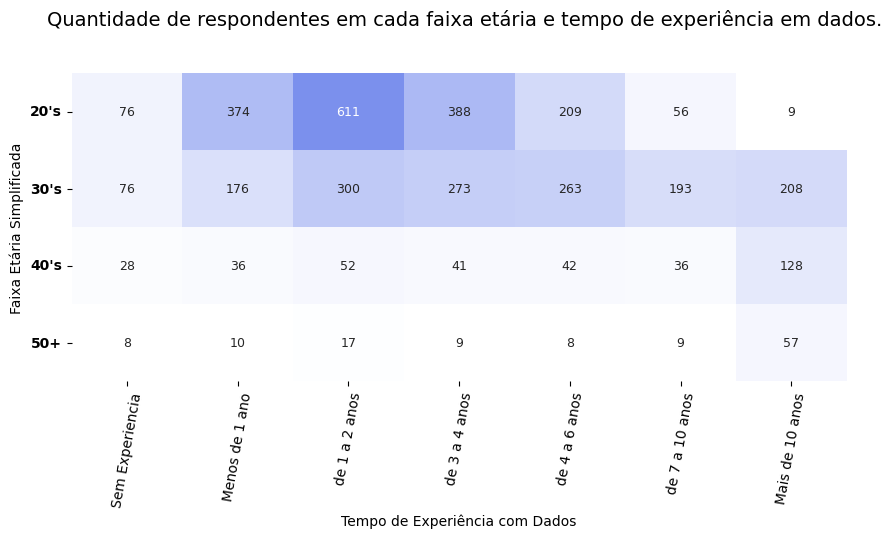

In [16]:
df['Tempo_Experiencia_Dados'] = pd.Categorical(df['Tempo_Experiencia_Dados'],
                                                  ["Não tenho experiência na área de dados","Menos de 1 ano",
                                                   "de 1 a 2 anos", "de 3 a 4 anos", "de 4 a 6 anos","de 7 a 10 anos",
                                                   "Mais de 10 anos"],ordered=True)

df['Tempo_Experiencia_Dados'] = df['Tempo_Experiencia_Dados'].cat.rename_categories({'Não tenho experiência na área de dados': "Sem Experiencia"})
                                                 
df_te = df.sort_values('Tempo_Experiencia_Dados')

df_te=pd.crosstab(df["Faixa_Etaria_Simplificada"],df["Tempo_Experiencia_Dados"])

fig, ax=plt.subplots(figsize=(10,4))
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",mainblue])
ax=sns.heatmap(df_te, annot=True, cmap=mycmap,fmt=".0f",annot_kws={"size": 9}, yticklabels=True, cbar=False)
ax.set(xlabel='Tempo de Experiência com Dados', ylabel='Faixa Etária Simplificada')
plt.yticks(rotation=0, weight = 'bold')
plt.xticks(rotation=80)

fig.text(0.1, 1., "Quantidade de respondentes em cada faixa etária e tempo de experiência em dados.",fontsize=14)   

plt.show()
warnings.filterwarnings("default")

<p style="font-size:18px"> São 334 participantes com 30 anos ou mais e com menos de um ano de experiência. Abaixo podemos ver uma summarização dos cargos e níveis deles.</p>

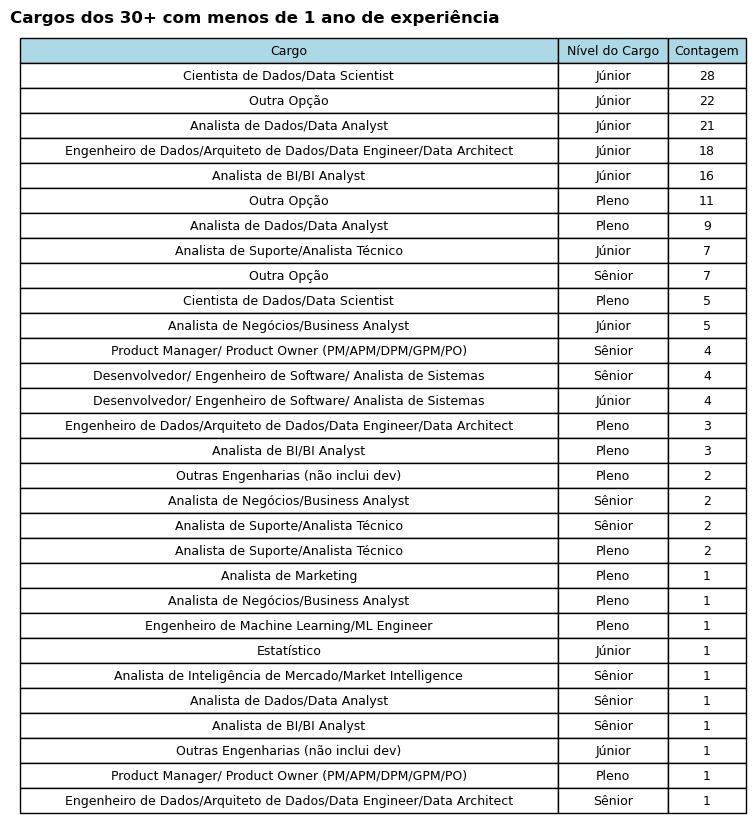

In [17]:
df_te2=df[df["Tempo_Experiencia_Dados"].isin(["Sem Experiência","Menos de 1 ano"]) &\
          df["Faixa_Etaria_Simplificada"].isin(["30's","40's", "50+"])][["Cargo","Nivel_Cargo"]].value_counts().reset_index()

df_te2.columns=["Cargo","Nível do Cargo", "Contagem"]

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = df_te2.values,  
    colLabels = df_te2.columns,
    cellLoc ='center',  
    colColours =["lightblue"] * 3,
    loc ='upper left')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(col=list(range(len(df_te2.columns)))) 
table.scale(1.5,1.5)
   
ax.set_title('Cargos dos 30+ com menos de 1 ano de experiência', loc='left',fontweight ="bold") 
   
plt.show()

# 8 - Cargo de Gestão

<p style="font-size:18px;font-weight:bold"> Dentre os que responderam essa pergunta, aproximadamente 19% são gestores</p>
<p style="font-size:14px"> * 577  participantes (14%) não responderam essa pergunta - São aqueles em situação de desemprego, somente estudantes e em área acadêmica.</p>
<p style="font-size:18px">A participação de gestores é muito diferente quando analisada por faixa etária?</p>


In [18]:
#df["Gestor"].apply(type).value_counts()
#df["Gestor"].isnull().sum()
#df[df['Gestor'].isnull()]['Situação_Trabalho'].value_counts()
#df['Situação_Trabalho'].value_counts()
#df[df['Faixa_Salarial'].notnull()]['Situação_Trabalho'].value_counts()
#df["Gestor"].value_counts()/df["Gestor"].value_counts().sum()

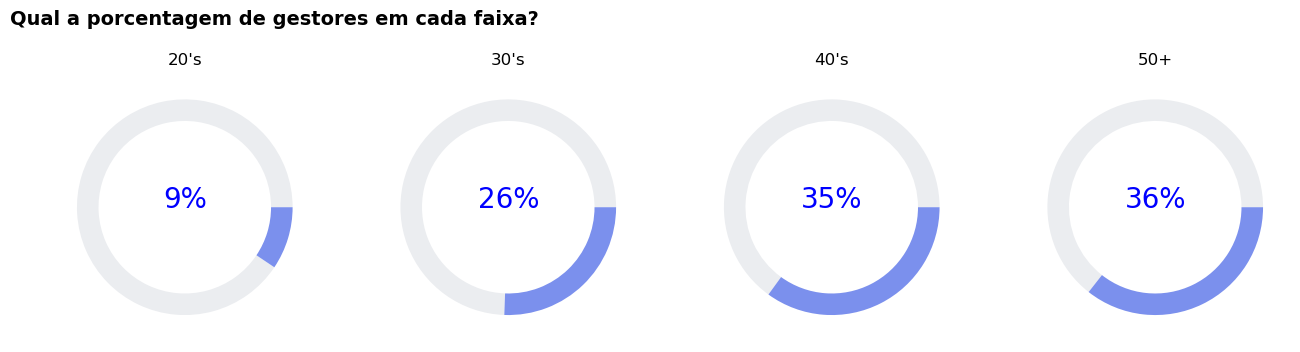

In [19]:
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(16,6))
for n,i in enumerate(["20's","30's", "40's", '50+']):
    dfd=df.loc[df['Faixa_Etaria_Simplificada']==i]['Gestor'].value_counts(normalize=True)
    ax=plt.subplot(1,4,n+1)
    ax.pie(dfd, wedgeprops={'width':0.2},colors=["#ebedf0",mainblue] )
    prop=dfd.loc[True]
    plt.text(0,0,f'{int(np.round(prop * 100))}%' , ha='center', fontsize=20, color="blue")
    plt.title(i)

     
fig.text(0.1, 0.8, "Qual a porcentagem de gestores em cada faixa?",fontsize=14,fontweight="bold")   

plt.show()

<p style="font-size:18px"> A participação de Gestores cresce ao longo das faixas mas não é muito diferente nas faixas 40's e 50+ </p>

# 9 - Salário

<p style="font-size:18px;font-weight:bold"> Como a Faixa Salarial se comporta em cada faixa etária?</p>


<p style="font-size:14px"> * 577 participantes (14%) não responderam essa pergunta - São aqueles em situação de desemprego, somente estudantes e em área acadêmica.</p>
<p style="font-size:18px"> Para complementar a análise, foi criada a variável 'Nível Salarial', a qual reflete a ordem das Faixas Salariais.</p>


In [20]:
#df["Faixa_Salarial"].apply(type).value_counts()
#df["Faixa_Salarial"].isnull().sum()
#df[df['Faixa_Salarial'].isnull()]['Faixa_Salarial'].apply(type).value_counts()
#df[df['Faixa_Salarial'].isnull()]['Situação_Trabalho'].value_counts()
#df[df['Faixa_Salarial'].isnull()]['Situação_Trabalho'].value_counts().sum()
#df[df['Faixa_Salarial'].notnull()]['Situação_Trabalho'].value_counts()

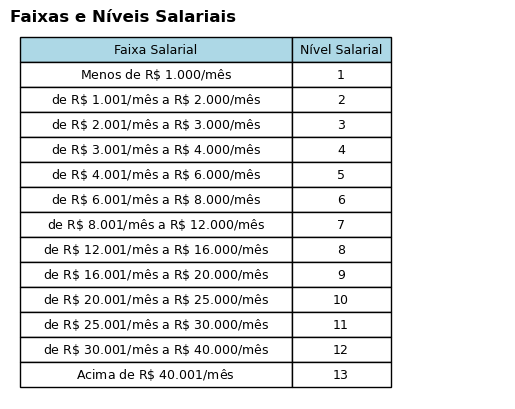

In [21]:
pd.options.mode.chained_assignment = None


df_f=df.dropna(subset=['Faixa_Salarial'])

dict_fs=dict()
dict_fs={"Menos de R$ 1.000/mês": '1',
         "de R$ 1.001/mês a R$ 2.000/mês":'2',
         "de R$ 2.001/mês a R$ 3.000/mês":'3',
         "de R$ 3.001/mês a R$ 4.000/mês":'4',
         "de R$ 4.001/mês a R$ 6.000/mês":'5',
         "de R$ 6.001/mês a R$ 8.000/mês":'6',
         "de R$ 8.001/mês a R$ 12.000/mês":'7',
         "de R$ 12.001/mês a R$ 16.000/mês":'8',
         "de R$ 16.001/mês a R$ 20.000/mês":'9',
         "de R$ 20.001/mês a R$ 25.000/mês":'10',
         "de R$ 25.001/mês a R$ 30.000/mês":'11',
         "de R$ 30.001/mês a R$ 40.000/mês":'12',
         "Acima de R$ 40.001/mês":'13'}


df_f['Nível_Salarial'] = df_f["Faixa_Salarial"].map(dict_fs)

df_ns=df_f[["Faixa_Salarial","Nível_Salarial"]].value_counts().to_frame().reset_index()
df_ns.columns=["Faixa Salarial","Nível Salarial", "Contagem"]
df_ns["Faixa Salarial"] = df_ns["Faixa Salarial"].str.replace('$', '$\$$', regex=True)
df_ns['Nível Salarial'] = pd.Categorical(df_ns['Nível Salarial'], ["1", "2", "3", "4","5", "6","7", "8","9", "10", "11", "12","13"],ordered=True)
df_ns = df_ns.sort_values('Nível Salarial')
df_ns_plot = df_ns[["Faixa Salarial","Nível Salarial"]]


fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = df_ns_plot.values,  
    colLabels = df_ns_plot.columns,
    cellLoc ='center',  
    colColours =["lightblue"] * 2,
    loc ='upper left')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(col=list(range(len(df_ns_plot.columns)))) 
table.scale(1.5,1.5)
   
ax.set_title('Faixas e Níveis Salariais', loc='left',fontweight ="bold") 
   
plt.show()


<p style="font-size:18px;font-weight:bold"> Quais as primeiras impressões que podemos ter na relação entre nível salarial e faixa etária ? </p>

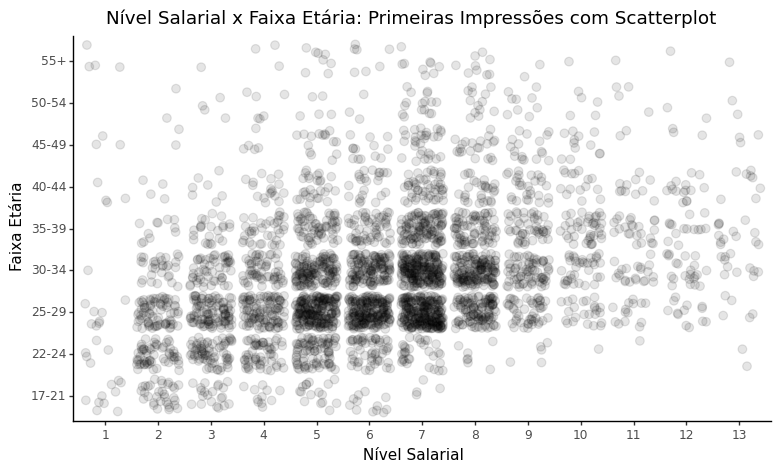

In [22]:
df_f['Nível_Salarial'] = pd.Categorical(df_f['Nível_Salarial'], ["1", "2", "3", "4","5", "6","7", "8","9", "10", "11", "12","13"],ordered=True)
df_f = df_f.sort_values('Nível_Salarial')

# scatterplot total
(
    ggplot(df_f, aes(x='Nível_Salarial', y='Faixa_Etaria'))+
    geom_jitter(alpha = 0.1, size=3)+
    labs(title="Nível Salarial x Faixa Etária: Primeiras Impressões com Scatterplot", x= " Nível Salarial", y= "Faixa Etária")+
    theme_classic()+
    theme(figure_size=(9, 5))
).draw();

<p style="font-size:18px;"> É possível perceber que altos salários já começam em idades menores e, os salários menores estão presentes em todas as faixas etárias, inclusive as acima de 40 anos. </p>

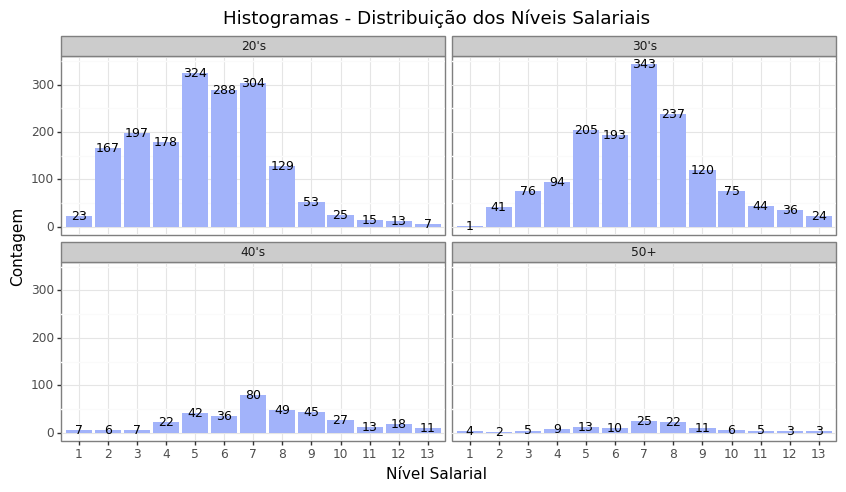

In [23]:
df_nsh= df_f[["Faixa_Etaria_Simplificada", "Nível_Salarial"]].value_counts().to_frame().reset_index()
df_nsh.columns=["Faixa_Etaria_Simplificada", "Nível_Salarial", "Contagem"]
df_nsh['Nível_Salarial'] = pd.Categorical(df_nsh['Nível_Salarial'], ["1", "2", "3", "4","5", "6","7", "8","9", "10", "11", "12","13"],ordered=True)
df_nsh = df_nsh.sort_values('Nível_Salarial')



(
    ggplot(df_nsh, aes(x='Nível_Salarial', y='Contagem'))+
    geom_bar(stat="identity", fill=secondblue)+
    geom_text(aes(label="Contagem"),size=9)+
    labs(x="Nível Salarial")+
    facet_wrap('Faixa_Etaria_Simplificada')+
    theme_bw()+
    theme(figure_size=(10, 5))+
    labs(title="Histogramas - Distribuição dos Níveis Salariais")

).draw();

<p style="font-size:18px"> As distribuições se mostram  semelhantes nos grupos 30's, 40's e 50+, com maior frequencia nos valores  intermediários. Já no grupo 20's temos maior presença de salários menores em comparação com as outras faixas etárias. O heatmap abaixo, mostra que, nos grupos 30's, 40's e 50+, a maior porcentagem de participantes está no Nivel Salarial 7 - de 8.001 a 12.000 reais por mês </p>

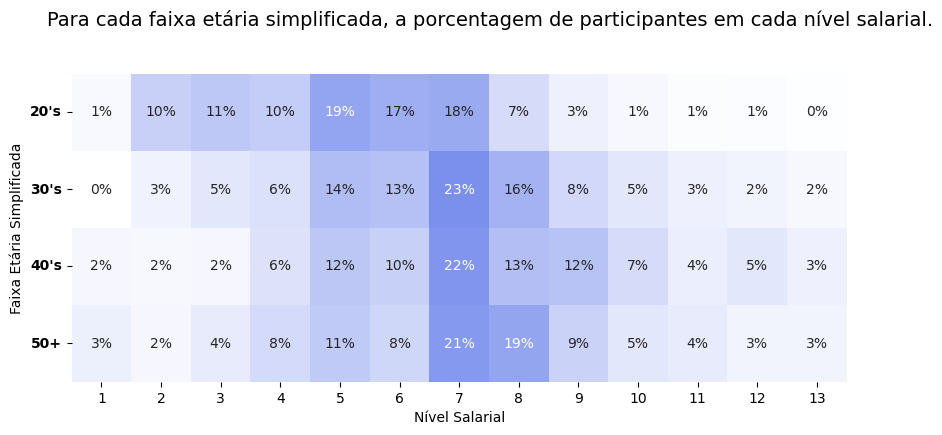

In [24]:
df_nsm=pd.crosstab( df_f["Faixa_Etaria_Simplificada"],df_f['Nível_Salarial'], normalize='index')

fig, ax=plt.subplots(figsize=(10,4))
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",mainblue])
ax=sns.heatmap(df_nsm, annot=True, cmap=mycmap,fmt=".0%",annot_kws={"size": 10}, yticklabels=True, cbar=False)
ax.set(xlabel='Nível Salarial', ylabel='Faixa Etária Simplificada')
plt.yticks(rotation=0, weight = 'bold')

fig.text(0.1, 1., "Para cada faixa etária simplificada, a porcentagem de participantes em cada nível salarial.",fontsize=14)   

plt.show()
warnings.filterwarnings("default")

<p style="font-size:20px;font-weight:bold">$$$</p>

<p style="font-size:18px">A área de Dados/TI é conhecida por boas oportunidades de carreira e salários atrativos. 47% dos respondentes que informaram a faixa salarial, ganham mais de 8 mil mensais. À título de curiosidade, conforme a 12º edição do BOLETIM DESIGUALDADE NAS METRÓPOLES*, os 10% mais ricos alcançaram o rendimento médio per capita de R$ 7.933,66</p>

*https://www.pucrs.br/datasocial/wp-content/uploads/sites/300/2023/04/BOLETIM_DESIGUALDADE-NAS-METROPOLE_12.pdf

<p style="font-size:14px">Esse valor de 8 mil reais chega perto de dividir os salários entre metade abaixo e metade acima dele (como uma mediana). </p>

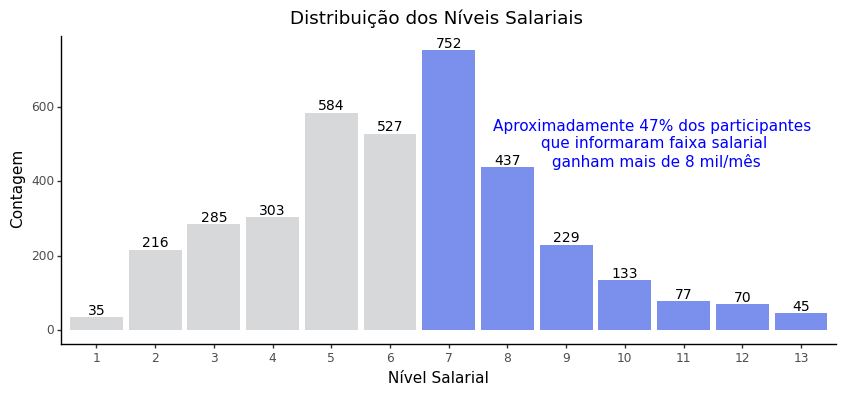

In [25]:
pd.options.mode.chained_assignment = "warn"
#df_ns[df_ns["Nível Salarial"].isin([ "7", "8","9", "10", "11", "12","13"])]['Contagem'].sum()/df_ns['Contagem'].sum()
color_dict = {'1': maingrey, 
              '2': maingrey, 
              '3': maingrey, 
              '4': maingrey, 
              '5': maingrey, 
              '6': maingrey,
              '7':  mainblue, 
              '8':  mainblue, 
              '9':  mainblue, 
              '10': mainblue, 
              '11': mainblue,
              '12': mainblue,
              '13': mainblue}


(
    ggplot(df_ns, aes(x='Nível Salarial',y='Contagem', fill='Nível Salarial'))+
    geom_bar(stat="identity")+
    geom_text(aes(label="Contagem"),size=10, va='bottom')+
    labs(title="Distribuição dos Níveis Salariais", x= " Nível Salarial")+
    theme_classic()+
    theme(figure_size=(10, 4))+
    scale_fill_manual(values=color_dict,guide=False)+
    annotate("text", x = 10.5, y = 500, color='blue',
             label = "Aproximadamente 47% dos participantes \n que informaram faixa salarial \n ganham mais de 8 mil/mês")
).draw();

<p style="font-size:18px;font-weight:bold">Mais ou menos de R$ 8 mil reais?</p>
<p style="font-size:18px">Como essa referência se comporta em cada faixa etária simplificada?  </p>


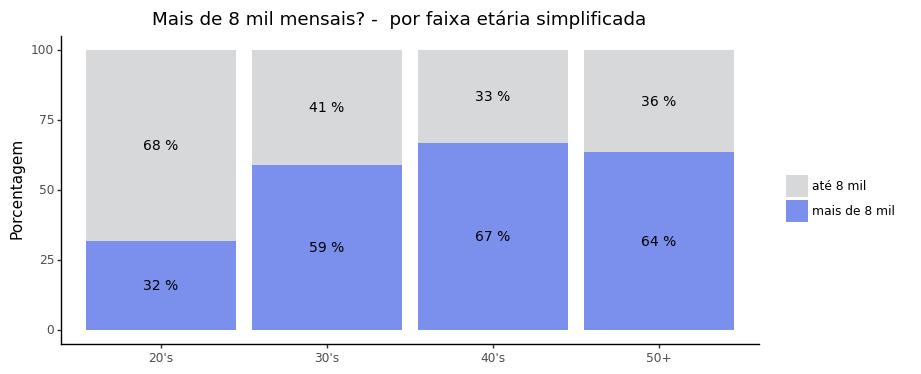

In [26]:
dict_fss=dict()
dict_fss={"Menos de R$ 1.000/mês": 'até 8 mil',
         "de R$ 1.001/mês a R$ 2.000/mês":'até 8 mil',
         "de R$ 2.001/mês a R$ 3.000/mês":'até 8 mil',
         "de R$ 3.001/mês a R$ 4.000/mês":'até 8 mil',
         "de R$ 4.001/mês a R$ 6.000/mês":'até 8 mil',
         "de R$ 6.001/mês a R$ 8.000/mês":'até 8 mil',
         "de R$ 8.001/mês a R$ 12.000/mês":'mais de 8 mil',
         "de R$ 12.001/mês a R$ 16.000/mês":'mais de 8 mil',
         "de R$ 16.001/mês a R$ 20.000/mês":'mais de 8 mil',
         "de R$ 20.001/mês a R$ 25.000/mês":'mais de 8 mil',
         "de R$ 25.001/mês a R$ 30.000/mês":'mais de 8 mil',
         "de R$ 30.001/mês a R$ 40.000/mês":'mais de 8 mil',
         "Acima de R$ 40.001/mês":'mais de 8 mil'}


df_f['Faixa_Salarial_Simplificada'] = df_f["Faixa_Salarial"].map(dict_fss)


df_fss=pd.crosstab(df_f["Faixa_Salarial_Simplificada"], df_f["Faixa_Etaria_Simplificada"],normalize='columns')
df_fss=df_fss.unstack().reset_index()
df_fss.columns=["Faixa_Etaria_Simplificada","Faixa_Salarial_Simplificada", "Porcentagem"]
df_fss['Porcentagem']= round(df_fss['Porcentagem']*100,1)


color_dict = {"até 8 mil": maingrey, 
              "mais de 8 mil": mainblue}


(
    ggplot(df_fss, aes(x='Faixa_Etaria_Simplificada', y='Porcentagem', fill='Faixa_Salarial_Simplificada') )+
    geom_bar(stat="identity")+
    #geom_text (aes(x='Faixa_Etaria_Simplificada', y= 'Porcentagem3', label = 'Porcentagem'), data=df_fss, format_string="{:.1f} %",)+
    geom_text(aes(label="Porcentagem"),size=10, format_string="{:.0f} %", position=position_stack(vjust = 0.5))+
    scale_fill_manual(values=color_dict)+
    labs(x="", fill ="")+
    theme_classic()+
    theme(figure_size=(9, 4))+
    labs(title="Mais de 8 mil mensais? -  por faixa etária simplificada")

).draw();

<p style="font-size:18px"> Nos grupos com idade igual ou superior a 30 anos, a maioria recebe mais de 8 mil reais de salário mensal! </p>

# 10 - Forma ideal de trabalho

<p style="font-size:18px;font-weight:bold"> Dentre os entrevistados que responderam essa pergunta, aproximadamente 52% prefere o Modelo híbrido flexível e aproximadamente 39% prefere o modelo 100% remoto.   </p>

<p style="font-size:14px"> * 577  participantes (14%) não responderam essa pergunta - São aqueles em situação de desemprego, somente estudantes e em área acadêmica.</p>

<p style="font-size:18px"> Quais as formas de trabalho ideais para cada faixa etária?</p>

In [27]:
#df["Forma_Ideal"].apply(type).value_counts()
#df["Forma_Ideal"].isnull().sum()
#df[df['Forma_Ideal'].isnull()]['Situação_Trabalho'].value_counts()
#df[df['Forma_Ideal'].isnull()]['Situação_Trabalho'].value_counts().sum()
#df[df['Forma_Ideal'].notnull()]['Situação_Trabalho'].value_counts()
#df['Forma_Ideal'].value_counts()/df['Forma_Ideal'].value_counts().sum()

In [28]:
pd.crosstab(df["Faixa_Etaria_Simplificada"],df['Forma_Ideal'], normalize='index').T.style.set_caption("").background_gradient().format("{:.1%}").set_table_styles(dfstyle)

Faixa_Etaria_Simplificada,20's,30's,40's,50+
Forma_Ideal,,,,
Modelo 100% presencial,1.3%,1.4%,1.4%,5.9%
Modelo 100% remoto,37.2%,41.4%,38.3%,39.8%
Modelo híbrido com dias fixos de trabalho presencial,5.9%,7.1%,8.8%,13.6%
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente),55.5%,50.1%,51.5%,40.7%


<p style="font-size:18px"> Em todas as faixas etárias o Modelo híbrido flexível é o mais escolhido como forma ideal. A preferência por modelos com trabalho presencial tem participação um pouco mais alta na faixa 50+ </p>

# 11 - Satisfação com empresa atual

<p style="font-size:18px;font-weight:bold"> 74% dos entrevistados que responderam essa pergunta informaram estar satisfeitos com a empresa atual  </p>

<p style="font-size:14px"> * 577  participantes (14%) não responderam essa pergunta - São aqueles em situação de desemprego, somente estudantes e em área acadêmica.</p>

<p style="font-size:18px"> Como fica o percentual de satisfeitos em cada faixa etária?</p>


In [29]:
#df["Satisfeito_Empresa"].apply(type).value_counts()
#df["Satisfeito_Empresa"].isnull().sum()
#df[df['Satisfeito_Empresa'].isnull()]['Situação_Trabalho'].value_counts()
#df[df['Satisfeito_Empresa'].isnull()]['Situação_Trabalho'].value_counts().sum()
#df[df['Satisfeito_Empresa'].notnull()]['Situação_Trabalho'].value_counts()
#df['Satisfeito_Empresa'].value_counts()/df['Satisfeito_Empresa'].value_counts().sum()

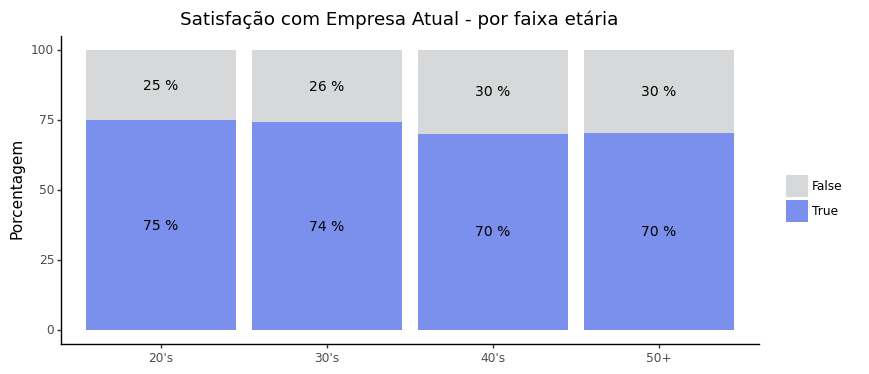

In [30]:
df_se=pd.crosstab(df["Satisfeito_Empresa"], df["Faixa_Etaria_Simplificada"],normalize='columns')
df_se=df_se.unstack().reset_index()
df_se.columns=["Faixa_Etaria_Simplificada","Satisfeito_Empresa", "Porcentagem"]
df_se['Porcentagem']= round(df_se['Porcentagem']*100,1)

color_dict = {False: maingrey, 
              True: mainblue}


(
    ggplot(df_se, aes(x='Faixa_Etaria_Simplificada', y='Porcentagem', fill='Satisfeito_Empresa') )+
    geom_bar(stat="identity")+
    geom_text(aes(label="Porcentagem"),size=10, format_string="{:.0f} %", position=position_stack(vjust = 0.5))+
    scale_fill_manual(values=color_dict)+
    labs(x="", fill ="")+
    theme_classic()+
    theme(figure_size=(9, 4))+
    labs(title="Satisfação com Empresa Atual - por faixa etária")

).draw();

<p style="font-size:18px"> O percentual de satisfeitos com o emprego atual diminue bem pouco a partir dos 40 anos </p>

# Considerações finais

<p style="font-size:18px"> O objetivo dessa análise foi encontrar semelhanças e diferenças entre faixas etárias.  </p>

<p style="font-size:18px"> As regiões do Brasil tem participações semelhantes nas differentes faixas etárias. A predominância do gênero masculino ocorre em todas as faixas, e é ainda maior na faixa 50+. </p>

<p style="font-size:18px"> No quesito educação, apesar da área TI/Computação ser a principal em todas as faixas, as áreas de finanças e outras engenharias também sobressairam um pouco mais em algumas faixas em relação as outras. </p>
 
<p style="font-size:18px"> Os salários mais altos já começaram em idades menores. Nos grupos com idade igual ou maior que 30 anos, a maioria recebe mais de 8 mil reais mensais.  A faixa 50+ apresentou algumas diferenças discretas em variáveis relacionadas a trabalho:  ela é a faixa com maior percentual de desempregados buscando recolocação, CNPJs e Freelancers. Também é a faixa com percentual um pouco maior na preferência por modelos com trabalho presencial.</p>
